## Final Project Submission

Please fill out:
* Student name: Kelvin Mwaura
* Student pace: full time
* Scheduled project review date/time: 
* Instructor name: Asha Deen
* Blog post URL:


GUIDING MICROSOFT'S MOVIE STUDIO VENTURE THROUGH EXPLORATORY DATA ANALYSIS.
1. Business Understanding



    a. Introduction

Microsoft recognizes the growing trend of big companies venturing into original video content creation and aims to establish its presence by launching a new movie studio. However, lacking expertise in the film industry, Microsoft is uncertain about the types of films that would yield the highest success at the box office. To make informed decisions about content creation, Microsoft seeks to understand the current landscape of successful movies and identify key factors contributing to their box office performance.


    b. Objectives
        1.1 General Objective

    To conduct a comprehensive analysis of recent box office trends and successful movie genres to provide actionable insights for Microsoft's new movie studio. By leveraging data analytics and market research, I will identify the top-performing genres, analyze audience preferences, and examine factors influencing box office success, such as budget, cast, storyline, and release timing. 
    The goal is to translate these findings into actionable recommendations that align with Microsoft's strategic objectives and creative vision. Ultimately, the objective is to empower the head of Microsoft's new movie studio with valuable insights to guide decision-making and maximize the studio's potential for success in the competitive film industry.

        1.2 Specific Objectives

        1. Loading datasets into pandas
        2. Retrieving data from a dataframe
        3. Data cleaning
        4. Exploratory data Analysis
        5. Data visualisation using seaborn and matplotlib

c. Questions To Answer

        1.What are the most popular genres in box office?
        2. How does the budget of a movie correlate with its box office success?
        3. Are there any trends in box office revenue over time for specific genres?
        4. What is the distribution of box office revenue among different movie genres?
        5.How do factors such as cast popularity, director reputation, and production company influence box office success?
        6. What are the typical characteristics (e.g., runtime, rating) of successful movies at the box office?
        7.Are there any emerging trends or niche genres showing potential for future success?


2. Data Understanding 

The dataset provided contains movie data sourced from multiple sources including Box Office Mojo, IMDB, Rotten Tomatoes, TheMovieDB, and The Numbers. Each dataset  contains information such as movie titles, release dates, genres, box office revenue, ratings, and other relevant attributes. 
Before proceeding with exploratory data analysis, it's essential to understand the structure, format, and quality of the data from each source to ensure accurate analysis and interpretation.

To begin our data exploration, we will import the necessary Python libraries for data manipulation, analysis, and visualization:

IMPORTING THE  DATA AND THE  RELEVANT PYTHON  LIBRARIES

In [39]:
import pandas as pd  # For data manipulation and analysis
import numpy as np   #For numerical computationst  # For data visualization
import sqlite3                    # for querying from the database
import seaborn as sns #for data visualisation
import matplotlib.pyplot as plt 
%matplotlib inline
import csv #for opening csv, tsv files
import os 


OPENING THE FILES TO DO UNDERSTAND THE DATA(DATA EXPLORATION)

In [40]:
#opening the database file and creating a connection
db = 'im.db/im.db'
conn = sqlite3.connect(db)

In [41]:
#getting to see the different tables inside the database
conn= sqlite3.connect('im.db/im.db')
pd.read_sql("""
SELECT *
FROM sqlite_master
""",conn)

,type,name,tbl_name,rootpage,sql
0,table,movie_basics,movie_basics,2,"CREATE TABLE ""movie_basics"" (\n""movie_id"" TEXT..."
1,table,directors,directors,3,"CREATE TABLE ""directors"" (\n""movie_id"" TEXT,\n..."
2,table,known_for,known_for,4,"CREATE TABLE ""known_for"" (\n""person_id"" TEXT,\..."
3,table,movie_akas,movie_akas,5,"CREATE TABLE ""movie_akas"" (\n""movie_id"" TEXT,\..."
4,table,movie_ratings,movie_ratings,6,"CREATE TABLE ""movie_ratings"" (\n""movie_id"" TEX..."
5,table,persons,persons,7,"CREATE TABLE ""persons"" (\n""person_id"" TEXT,\n ..."
6,table,principals,principals,8,"CREATE TABLE ""principals"" (\n""movie_id"" TEXT,\..."
7,table,writers,writers,9,"CREATE TABLE ""writers"" (\n""movie_id"" TEXT,\n ..."


OPENING THE VARIOUS RELEVANT TABLES INSIDE THE DATABASE FILE

In [42]:
#opening  the MOVIE BASICS table to see the data inside 
movie_basics = pd.read_sql("""
SELECT *
FROM movie_basics;
""", conn)
movie_basics.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [43]:
##opening  the MOVIE RATINGS table to see the data inside 
movie_ratings = pd.read_sql("""SELECT *
FROM movie_ratings;
""", conn)
movie_ratings.head()

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


LOOKING AT THE OTHER DATASETS AND FILES PROVIDED JUST TO SEE WHAT DATA I WILL USE FOR MY DATA ANALYSIS

In [44]:
import csv
import pandas as pd
#Creating the variable name tmdb in order to read the  csv file as a dataframe using the pandas library
tmdb = pd.read_csv('./tmdb.movies.csv.gz')
tmdb.head(10) #getting the first ten rows of our data


,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186
5,5,"[12, 14, 10751]",32657,en,Percy Jackson & the Olympians: The Lightning T...,26.691,2010-02-11,Percy Jackson & the Olympians: The Lightning T...,6.1,4229
6,6,"[28, 12, 14, 878]",19995,en,Avatar,26.526,2009-12-18,Avatar,7.4,18676
7,7,"[16, 10751, 35]",10193,en,Toy Story 3,24.445,2010-06-17,Toy Story 3,7.7,8340
8,8,"[16, 10751, 35]",20352,en,Despicable Me,23.673,2010-07-09,Despicable Me,7.2,10057
9,9,"[16, 28, 35, 10751, 878]",38055,en,Megamind,22.855,2010-11-04,Megamind,6.8,3635


In [45]:
tmdb.info() #previewing the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         26517 non-null  int64  
 1   genre_ids          26517 non-null  object 
 2   id                 26517 non-null  int64  
 3   original_language  26517 non-null  object 
 4   original_title     26517 non-null  object 
 5   popularity         26517 non-null  float64
 6   release_date       26517 non-null  object 
 7   title              26517 non-null  object 
 8   vote_average       26517 non-null  float64
 9   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 2.0+ MB


In [46]:
import csv
import pandas as pd
#Creating the variable name bom-movie_gross in order to read the  csv file as a dataframe using the pandas library

bom_movie_gross= pd.read_csv('bom.movie_gross.csv.gz')
bom_movie_gross.head(10)

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
5,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000,2010
6,Iron Man 2,Par.,312400000.0,311500000,2010
7,Tangled,BV,200800000.0,391000000,2010
8,Despicable Me,Uni.,251500000.0,291600000,2010
9,How to Train Your Dragon,P/DW,217600000.0,277300000,2010


In [47]:
bom_movie_gross.describe() #getting the statistical measures

,domestic_gross,year
count,3.359000e+03,3387.000000
mean,2.874585e+07,2013.958075
std,6.698250e+07,2.478141
min,1.000000e+02,2010.000000
25%,1.200000e+05,2012.000000
50%,1.400000e+06,2014.000000
75%,2.790000e+07,2016.000000
max,9.367000e+08,2018.000000


In [48]:
bom_movie_gross.info() #previewing the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


I DECIDED TO USE  3 DATASETS  TO CONDUCT MY DATA ANALYSIS FROM THE ONE'S PROVIDED. 


LETS NOW DO SOME ACTAUAL ANALYSIS AND CLEANING.

LETS GO BACK TO OUR DATABASE FILE AND EXPLORE THE MOVIE BASICS AND THE MOVIE RATINGS TABLES.

In [49]:
movie_basics.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [50]:
movie_basics.nunique() #checking the unique values in movie basics

movie_id           146144
primary_title      136071
original_title     137773
start_year             19
runtime_minutes       367
genres               1085
dtype: int64

Checking to see if there are duplicates in the movie_basics unique columns


In [51]:
movie_basics.describe()

,start_year,runtime_minutes
count,146144.000000,114405.000000
mean,2014.621798,86.187247
std,2.733583,166.360590
min,2010.000000,1.000000
25%,2012.000000,70.000000
50%,2015.000000,87.000000
75%,2017.000000,99.000000
max,2115.000000,51420.000000


The movie ID is the primary key in the movie basics dataset
Some movies have the same primary title but are  clearly no identical based of the genres and the run time columns .
There are 10073 duplicates(same primary title but with different movie id's)




In [52]:
# Let's look at the movie ratings
movie_ratings = pd.read_sql("""
SELECT *
FROM movie_ratings;
""", conn)

movie_ratings.head()

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [53]:
movie_ratings.info() #info about thr data set

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movie_id       73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


In [54]:
movie_ratings.describe() #statistical measures about the datatset

,averagerating,numvotes
count,73856.000000,7.385600e+04
mean,6.332729,3.523662e+03
std,1.474978,3.029402e+04
min,1.000000,5.000000e+00
25%,5.500000,1.400000e+01
50%,6.500000,4.900000e+01
75%,7.400000,2.820000e+02
max,10.000000,1.841066e+06


LETS TRY CLEANING THE DATABASE DATA 

In [55]:
#Looking for missing  values
movie_basics.isna().sum()

movie_id               0
primary_title          0
original_title        21
start_year             0
runtime_minutes    31739
genres              5408
dtype: int64

there are 31739, 21, 5408,missing values in the runtime_minutes ,original title and genres columns respectively

In [56]:
# looking at data completeness
#calculates the proportion of missing values in each column of the dataset.
movie_basics.isna().sum()/len(movie_basics)

movie_id           0.000000
primary_title      0.000000
original_title     0.000144
start_year         0.000000
runtime_minutes    0.217176
genres             0.037005
dtype: float64

In [57]:
# dealing with the categorical data in the genres column
movie_basics ["genres"].fillna("unknown", inplace=True)

In [58]:
movie_basics.dropna(subset=['runtime_minutes'], inplace=True)  #dropping rows 


I have dropped the rows that miss the runtime minutes, it is not good practice to use mean to replace the missing data as there are outliers and that will end up skewing the data.

In [59]:
movie_basics.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
5,tt0111414,A Thin Life,A Thin Life,2018,75.0,Comedy


CLEANING THE OTHER DATA FILES

In [71]:
tmdb.columns #looking at the column names

Index(['genre_ids', 'id', 'original_language', 'original_title', 'popularity',
       'release_date', 'title', 'vote_average', 'vote_count'],
      dtype='object')

In [75]:
#statistical measures of this file
tmdb.describe()

,id,popularity,vote_average,vote_count
count,26517.000000,26517.000000,26517.000000,26517.000000
mean,295050.153260,3.130912,5.991281,194.224837
std,153661.615648,4.355229,1.852946,960.961095
min,27.000000,0.600000,0.000000,1.000000
25%,157851.000000,0.600000,5.000000,2.000000
50%,309581.000000,1.374000,6.000000,5.000000
75%,419542.000000,3.694000,7.000000,28.000000
max,608444.000000,80.773000,10.000000,22186.000000


Exploring the Bom Gross Data set

In [ ]:
bom_movie_gross.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [ ]:
bom_movie_gross.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


Let's check how many missing values each column has.

In [ ]:
bom_movie_gross.isna().sum()

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

In [ ]:
bom_movie_gross.shape #shape of the dataset
# has 3387 rows and 5 columns

(3387, 5)

The dataframe has 3387 rows and 5 columns
The Studio column has 5 missing values, we can deal with them by replacing them with the mode of the column since the column is categorical. Let's find the mode of that column.            The  domestic_gross column has 28 missing values, foreign_gross column has 1350 missing values. 

In [ ]:
bom_movie_gross['studio'].value_counts()  #finding the mode

IFC      166
Uni.     147
WB       140
Magn.    136
Fox      136
        ... 
TAFC       1
DR         1
FOR        1
PBS        1
MPFT       1
Name: studio, Length: 257, dtype: int64

In [ ]:
#replacing the missing studio values  with the mode which is the IFC row
bom_movie_gross['studio'].fillna(value='IFC',inplace=True)

In [ ]:
bom_movie_gross['studio'].isna().sum()  #making sure there are no missing values.

0

In [ ]:
#The next column is domestic_gross which has 28 missing values. We can replace them with the median of that column since this column has numerical values. 
bom_movie_gross['domestic_gross'].fillna(bom_movie_gross['domestic_gross'].median(),inplace=True)

In [ ]:
bom_movie_gross['domestic_gross'].isna().sum()   #no missing values as well

0

In [ ]:
#check what percentage the missing values constitues of the entire foreign_gross column.
missing_values = (bom_movie_gross['foreign_gross'].isna().sum() / len(bom_movie_gross['foreign_gross']))*100
missing_values
print("The missing values constitues" ,{missing_values} ,"of the foreign_gross column".format(missing_values))

The missing values constitues {39.85828166519043} of the foreign_gross column


That's (39%) of the entire column data to just ignore. It will really affect the results of our data. We can just drop the rows that have missing values.

In [ ]:
bom_movie_gross.dropna(subset=['foreign_gross'],inplace=True)

In [ ]:
bom_movie_gross.isna().sum()  #making sure there are no missing values

title             0
studio            0
domestic_gross    0
foreign_gross     0
year              0
dtype: int64

This dataframe has 5 columns in which the title column,studio column and foreign gross column contains object type data,the domestic gross column
 has data of data type float, and the year column contains data of data type ,integer. In this dataframe,bom_movie_gross,the column studio,
 domestic_gross and foreign_gross have missing values. 



The column, foreign gross, contains numerical values yet the column is of data type object. Clearly that is not right. So let's convert the column to type float. Let'sfix that

In [ ]:
# Using f-string interpolation to replace commas and convert to float
bom_movie_gross['foreign_gross'] = [float(f"{i}".replace(",", "")) for i in bom_movie_gross['foreign_gross']]


In [ ]:
bom_movie_gross.info() #checking if the changes were effected

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   float64
 4   year            3387 non-null   int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 132.4+ KB


In [ ]:
bom_movie_gross.duplicated().value_counts() #checking for duplicates

False    3387
dtype: int64

No duplicates here. Whoop! Whoop! 

Let's Find Those Place Holder values if any.

In [ ]:
# Using apply() function along with lambda function to print value counts for each column
bom_movie_gross.apply(lambda col: print(col.name, '\n', col.value_counts(normalize=True).head(), '\n\n'))


title 
 Bluebeard                    0.000590
What We Do in the Shadows    0.000295
The Boy (2016)               0.000295
Club Life                    0.000295
Railroad Tigers              0.000295
Name: title, dtype: float64 


studio 
 IFC      0.049083
Uni.     0.043465
WB       0.041396
Magn.    0.040213
Fox      0.040213
Name: studio, dtype: float64 


domestic_gross 
 1100000.0    0.009527
1000000.0    0.008931
1300000.0    0.008931
1200000.0    0.007443
1400000.0    0.006847
Name: domestic_gross, dtype: float64 


foreign_gross 
 1200000.0    0.011291
1100000.0    0.006873
1900000.0    0.005891
4200000.0    0.005891
2500000.0    0.005400
Name: foreign_gross, dtype: float64 


year 
 2015    0.132861
2016    0.128727
2012    0.118099
2011    0.117803
2014    0.116622
Name: year, dtype: float64 




title             None
studio            None
domestic_gross    None
foreign_gross     None
year              None
dtype: object

There are no place holder values

DATA ANALYSIS 
        Ineferential Statistics

In [ ]:
bom_movie_gross.describe()

,domestic_gross,foreign_gross,year
count,2.037000e+03,2.037000e+03,2037.000000
mean,4.634668e+07,7.487281e+07,2013.492882
std,8.121024e+07,1.374106e+08,2.592412
min,4.000000e+02,6.000000e+02,2010.000000
25%,6.970000e+05,3.700000e+06,2011.000000
50%,1.550000e+07,1.870000e+07,2013.000000
75%,5.550000e+07,7.490000e+07,2016.000000
max,9.367000e+08,9.605000e+08,2018.000000


On comparing the mean and the median in both columns;in the domestic gross column, the mean is higher than the median implying that the data is skewed to the right,that is, it is positively skewed. In the foreign gross column, the mean is also higher than the median, implying that it is also positively skewed.

Let's visualize the distribution of these two columns.

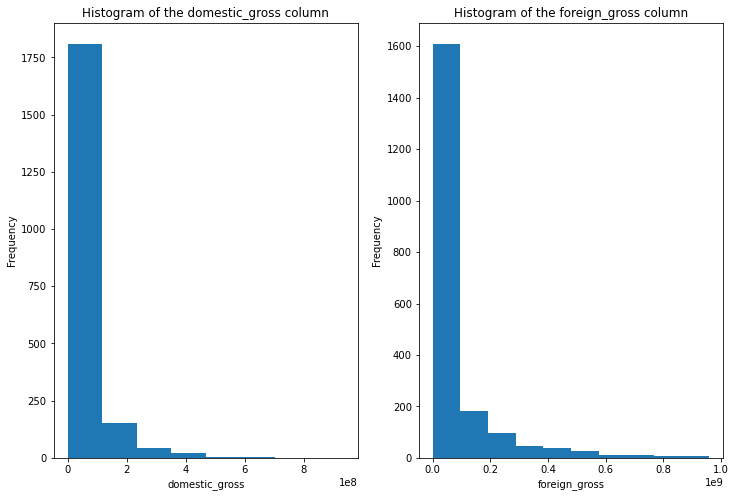

In [ ]:
fig,(ax1,ax2)=plt.subplots(figsize=(12,8),nrows=1,ncols=2)
ax1.hist(bom_movie_gross['domestic_gross'],bins=8)
ax1.set_xlabel('domestic_gross')
ax1.set_ylabel('Frequency')
ax1.set_title('Histogram of the domestic_gross column')

ax2.hist(bom_movie_gross['foreign_gross'],bins=10)
ax2.set_xlabel('foreign_gross')
ax2.set_ylabel('Frequency')
ax2.set_title('Histogram of the foreign_gross column')

plt.show;

The histogram shows that the data in both columns is positively skewed. Let's check if these two variables are correlated.

In [ ]:
# calculate the correlation matrix
corr_matrix = bom_movie_gross.corr()

# print the correlation matrix
print(corr_matrix)

                domestic_gross  foreign_gross      year
domestic_gross        1.000000       0.768451  0.122727
foreign_gross         0.768451       1.000000  0.145653
year                  0.122727       0.145653  1.000000


From this correlation matrix, we can tell that the correlation between domestic gross and foreign gross is 0.768451 which indicates that the two variables have a strong relationship and that they are positively correlated ,that is, increase in domestic gross leads to increase in foreign gross and vice versa. We can visualize this using a scatter plot.



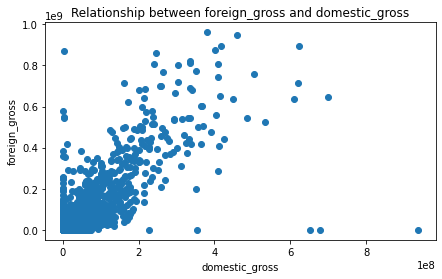

In [ ]:
fig, ax=plt.subplots(figsize=(7,4))
ax.scatter(bom_movie_gross['domestic_gross'],bom_movie_gross['foreign_gross'])
ax.set_xlabel('domestic_gross')
ax.set_ylabel('foreign_gross')
ax.set_title('Relationship between foreign_gross and domestic_gross')
plt.show;

From this scatter plot, we can tell that foreign_gross and domestic_gross have a very strong relationship , they have a highly positive correlation. From the correlation matrix above. 

This suggests that there are some movies with exceptionally high domestic gross values, which are causing the distribution to be positively skeweD
 The correlation between foreign_gross and year is 0.145653 which is a positive correlation, though not strong, implying that as years go by, the foreign gross increases. The correlation between year and domestic gross is 0.122727 ,which is a positive correlation, implying that as years go by the domestic gross increases.

To further understand our data, lets find out the top movies from this data.

In [ ]:
bom_movie_gross = bom_movie_gross.sort_values('foreign_gross', ascending=False)


In [ ]:
bom_movie_gross.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000.0,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010
3,Inception,WB,292600000.0,535700000.0,2010
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010


sorting the dataframe using the foreign gross, the top 5 movies are;Toy Story 3. Alice in Wonderland ,Harry Potter and the Deathly Hallows Part 1,Inception and Shrek Forever After

In [ ]:
bom_movie_df = bom_movie_gross.sort_values(['domestic_gross'], ascending=False)
bom_movie_df.head()

,title,studio,domestic_gross,foreign_gross,year
1872,Star Wars: The Force Awakens,BV,936700000.0,1131.6,2015
3080,Black Panther,BV,700100000.0,646900000.0,2018
3079,Avengers: Infinity War,BV,678800000.0,1369.5,2018
1873,Jurassic World,Uni.,652300000.0,1019.4,2015
727,Marvel's The Avengers,BV,623400000.0,895500000.0,2012


Sorting the dataframe using the domestic gross, the top 5 movies are;Star Wars: The Force Awakens, Black Panther, Avengers: Infinity War, Jurassic World and Marvel's The Avengers. We can also see that most of the top movies were recorded by BV and Uni studios. More research on both these studios might be necessary so as to know why their movies came up top.

MERGING OF THE DATA SETS
I will use the tmbd and bom gross data sets and merge them into one data frame as that will help me achieve the Objective of my project.

In [76]:
merged_df = tmdb.merge(bom_movie_gross ,how = 'inner',on = 'title') #i used the merge function and now I have created a new data frame taht will help me achieve my objectives.
merged_df.head()

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count,studio,domestic_gross,foreign_gross,year
0,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,P/DW,217600000.0,277300000,2010
1,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368,Par.,312400000.0,311500000,2010
2,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186,WB,292600000.0,535700000,2010
3,"[16, 10751, 35]",10193,en,Toy Story 3,24.445,2010-06-17,Toy Story 3,7.7,8340,BV,415000000.0,652000000,2010
4,"[16, 10751, 35]",20352,en,Despicable Me,23.673,2010-07-09,Despicable Me,7.2,10057,Uni.,251500000.0,291600000,2010


In [77]:
merged_df.tail() #checking the last rows of the df

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count,studio,domestic_gross,foreign_gross,year
2698,"[16, 10751, 12]",455842,en,Elliot: The Littlest Reindeer,2.903,2018-11-30,Elliot: The Littlest Reindeer,3.4,7,Scre.,24300.0,NaN,2018
2699,"[28, 12, 16]",332718,en,Bilal: A New Breed of Hero,2.707,2018-02-02,Bilal: A New Breed of Hero,6.8,54,VE,491000.0,1700000,2018
2700,[35],498919,es,La Boda de Valentina,2.550,2018-02-09,La Boda de Valentina,6.3,7,PNT,2800000.0,NaN,2018
2701,[18],470641,hi,मुक्काबाज़,2.276,2018-01-12,Mukkabaaz,7.5,18,Eros,75900.0,NaN,2018
2702,"[10749, 18]",551634,zh,你好，之华,0.600,2018-11-09,Last Letter,6.0,1,CL,181000.0,NaN,2018


In [80]:
merged_df.describe()

,id,popularity,vote_average,vote_count,domestic_gross,year
count,2703.000000,2703.000000,2703.000000,2703.000000,2.682000e+03,2703.000000
mean,213291.491306,10.002752,6.418572,1358.194599,3.629150e+07,2014.044395
std,139706.978070,7.294182,0.916424,2408.885097,7.734897e+07,2.440458
min,1771.000000,0.600000,0.000000,1.000000,1.000000e+02,2010.000000
25%,76493.500000,5.881000,5.900000,78.000000,2.000000e+05,2012.000000
50%,209249.000000,8.627000,6.500000,393.000000,3.800000e+06,2014.000000
75%,334521.500000,12.698500,7.000000,1440.000000,3.882500e+07,2016.000000
max,574534.000000,80.773000,10.000000,22186.000000,9.367000e+08,2018.000000


CHECKING IF WE NEED TO CLEAN THE MERGED DF AGAIN

In [78]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2703 entries, 0 to 2702
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   genre_ids          2703 non-null   object 
 1   id                 2703 non-null   int64  
 2   original_language  2703 non-null   object 
 3   original_title     2703 non-null   object 
 4   popularity         2703 non-null   float64
 5   release_date       2703 non-null   object 
 6   title              2703 non-null   object 
 7   vote_average       2703 non-null   float64
 8   vote_count         2703 non-null   int64  
 9   studio             2702 non-null   object 
 10  domestic_gross     2682 non-null   float64
 11  foreign_gross      1723 non-null   object 
 12  year               2703 non-null   int64  
dtypes: float64(3), int64(3), object(7)
memory usage: 295.6+ KB


In [79]:
merged_df.isna().sum() #chcking for null values

genre_ids              0
id                     0
original_language      0
original_title         0
popularity             0
release_date           0
title                  0
vote_average           0
vote_count             0
studio                 1
domestic_gross        21
foreign_gross        980
year                   0
dtype: int64

LET'S deal with the null values in the foreign gross column the domestic gross column and the studio colum

In [87]:


# Fill missing values with mean for numeric columns
merged_df.fillna(merged_df.mean(), inplace=True)

# Fill missing values with mode for categorical columns
for col in merged_df.select_dtypes(include=['object']).columns:
    merged_df[col].fillna(merged_df[col].mode()[0], inplace=True)




In [85]:
merged_df.isna().sum() #checking if it worked #no null values in merged df

genre_ids            0
id                   0
original_language    0
original_title       0
popularity           0
release_date         0
title                0
vote_average         0
vote_count           0
studio               0
domestic_gross       0
foreign_gross        0
year                 0
dtype: int64

#checking for duplicates in merged df

In [88]:
merged_df.duplicated().sum() #we have 247 duplicates

247

In [89]:
merged_df =merged_df.drop_duplicates() #dropping duplicates

In [90]:
#We confirm that we have dropped all duplicated rows and the result should be zero
merged_df.duplicated().sum()

0

DROPPING THE IRRELEVANT COLUMNS EVEN FUTHER

In [91]:
#We drop irrelevant columns
merged_df = merged_df.drop('genre_ids', axis = 1)
merged_df = merged_df.drop('original_title', axis = 1)
merged_df

,id,original_language,popularity,release_date,title,vote_average,vote_count,studio,domestic_gross,foreign_gross,year
0,10191,en,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,P/DW,217600000.0,277300000,2010
1,10138,en,28.515,2010-05-07,Iron Man 2,6.8,12368,Par.,312400000.0,311500000,2010
2,27205,en,27.920,2010-07-16,Inception,8.3,22186,WB,292600000.0,535700000,2010
3,10193,en,24.445,2010-06-17,Toy Story 3,7.7,8340,BV,415000000.0,652000000,2010
4,20352,en,23.673,2010-07-09,Despicable Me,7.2,10057,Uni.,251500000.0,291600000,2010
...,...,...,...,...,...,...,...,...,...,...,...
2698,455842,en,2.903,2018-11-30,Elliot: The Littlest Reindeer,3.4,7,Scre.,24300.0,1200000,2018
2699,332718,en,2.707,2018-02-02,Bilal: A New Breed of Hero,6.8,54,VE,491000.0,1700000,2018
2700,498919,es,2.550,2018-02-09,La Boda de Valentina,6.3,7,PNT,2800000.0,1200000,2018
2701,470641,hi,2.276,2018-01-12,Mukkabaaz,7.5,18,Eros,75900.0,1200000,2018


In [92]:
merged_df.info() #just getting an overview of the cleaned df

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2456 entries, 0 to 2702
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 2456 non-null   int64  
 1   original_language  2456 non-null   object 
 2   popularity         2456 non-null   float64
 3   release_date       2456 non-null   object 
 4   title              2456 non-null   object 
 5   vote_average       2456 non-null   float64
 6   vote_count         2456 non-null   int64  
 7   studio             2456 non-null   object 
 8   domestic_gross     2456 non-null   float64
 9   foreign_gross      2456 non-null   object 
 10  year               2456 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 230.2+ KB


DATA ANALYSIS AND VISUALISATION

In [93]:
#We are getting the counts of the movie languages most produced by the studios
x =merged_df['original_language'].unique()
x = merged_df['original_language'].value_counts()
x

en    1950
fr     115
hi      61
zh      51
es      40
ja      31
ko      28
de      24
no      16
cn      15
it      14
ru      12
da      12
he      11
pt      10
sv      10
ro       6
th       5
nl       5
ta       4
pl       4
ar       4
hu       4
el       3
fa       3
tr       2
uk       2
is       2
ca       1
mi       1
et       1
id       1
xx       1
te       1
ka       1
fi       1
eu       1
tl       1
lt       1
vi       1
Name: original_language, dtype: int64

English movies are the most produced

In [ ]:
top_10_studios = list(bom_movie_gross['studio'].value_counts().index[0:10])
top_10_studios

['Uni.', 'Fox', 'WB', 'Sony', 'BV', 'Par.', 'LGF', 'IFC', 'Wein.', 'SPC']

<AxesSubplot:xlabel='studio'>

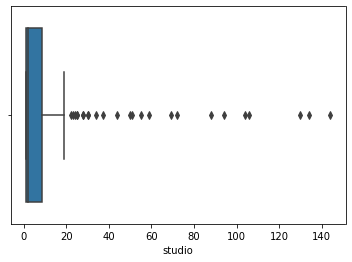

In [ ]:
#We plot a boxplot to show the distribution of our production studios
sns.boxplot(x = bom_movie_gross['studio'].value_counts())

Here above, the boxplot outlines values as outliers but it is simply a visualization of how dominant a few studios are in the market.  
This could indicate lack of a worthy competitor hence a market gap

We can examine how movie Production has been changing over the last 20 years and see if there is any correlation

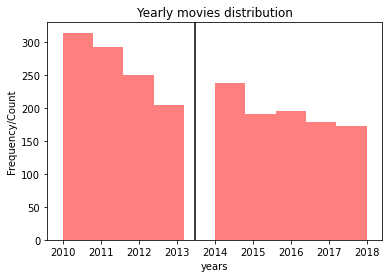

In [ ]:
#Histogram showing the movie production rate between 2010 and 2018
ax = bom_movie_gross['year'].plot.hist(color='red', alpha=0.5)

ax.set_title('Yearly movies distribution')

ax.set_ylabel('Frequency/Count')
ax.set_xlabel('years')

plt.axvline(x = bom_movie_gross['year'].mean(), color = 'black', label = 'average popularity');